# Auto MPG Dataset

This dataset summary was taken from UCI Machine Learning Repository.<br>

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993) <br>

Attribute Information:<br>

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

## Importing necessary libraries.

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Importing dataset

In [127]:
car_df=pd.read_csv(r'C:\Users\Vikas Jaiswal\Desktop\Data Science HH\Latha Mam\auto-mpg.csv')

In [128]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [129]:
car_df.shape

(398, 9)

## Data Cleaning

#### Droping Useless columns 

In [130]:
car_df = car_df.drop(columns='car name')

In [131]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [132]:
#replacing categorical variable with actual values
car_df['origin']= car_df['origin'].replace({1:'america',2:'europe',3:'asia'})
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [133]:
#one hot encoding
car_df=pd.get_dummies(car_df,columns=['origin'])
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


### Dealing with wrongly entered data in dataset

In [134]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 23.1+ KB


As we can observe by seeing the dataset as hp is numerical data but in .info() give result as object.<br>
It means that some entries in hp column is categorical value.<br>
So, we have to obtain these values.<BR>
After then we can drop these values or can replaced with median or mean value.

In [135]:
hpIsDigit= pd.DataFrame(car_df.hp.str.isdigit())
car_df[hpIsDigit['hp']==False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [136]:
car_df=car_df.replace('?',np.nan)
car_df[hpIsDigit['hp']== False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [137]:
car_df.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [138]:
medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['hp'] = car_df['hp'].astype('float64')

In [139]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    float64
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    uint8  
 8   origin_asia     398 non-null    uint8  
 9   origin_europe   398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 23.1 KB


## Statistics Summary

In [140]:
car_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


## Cleaned Dataset

In [141]:
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## Plots describing the data

### BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

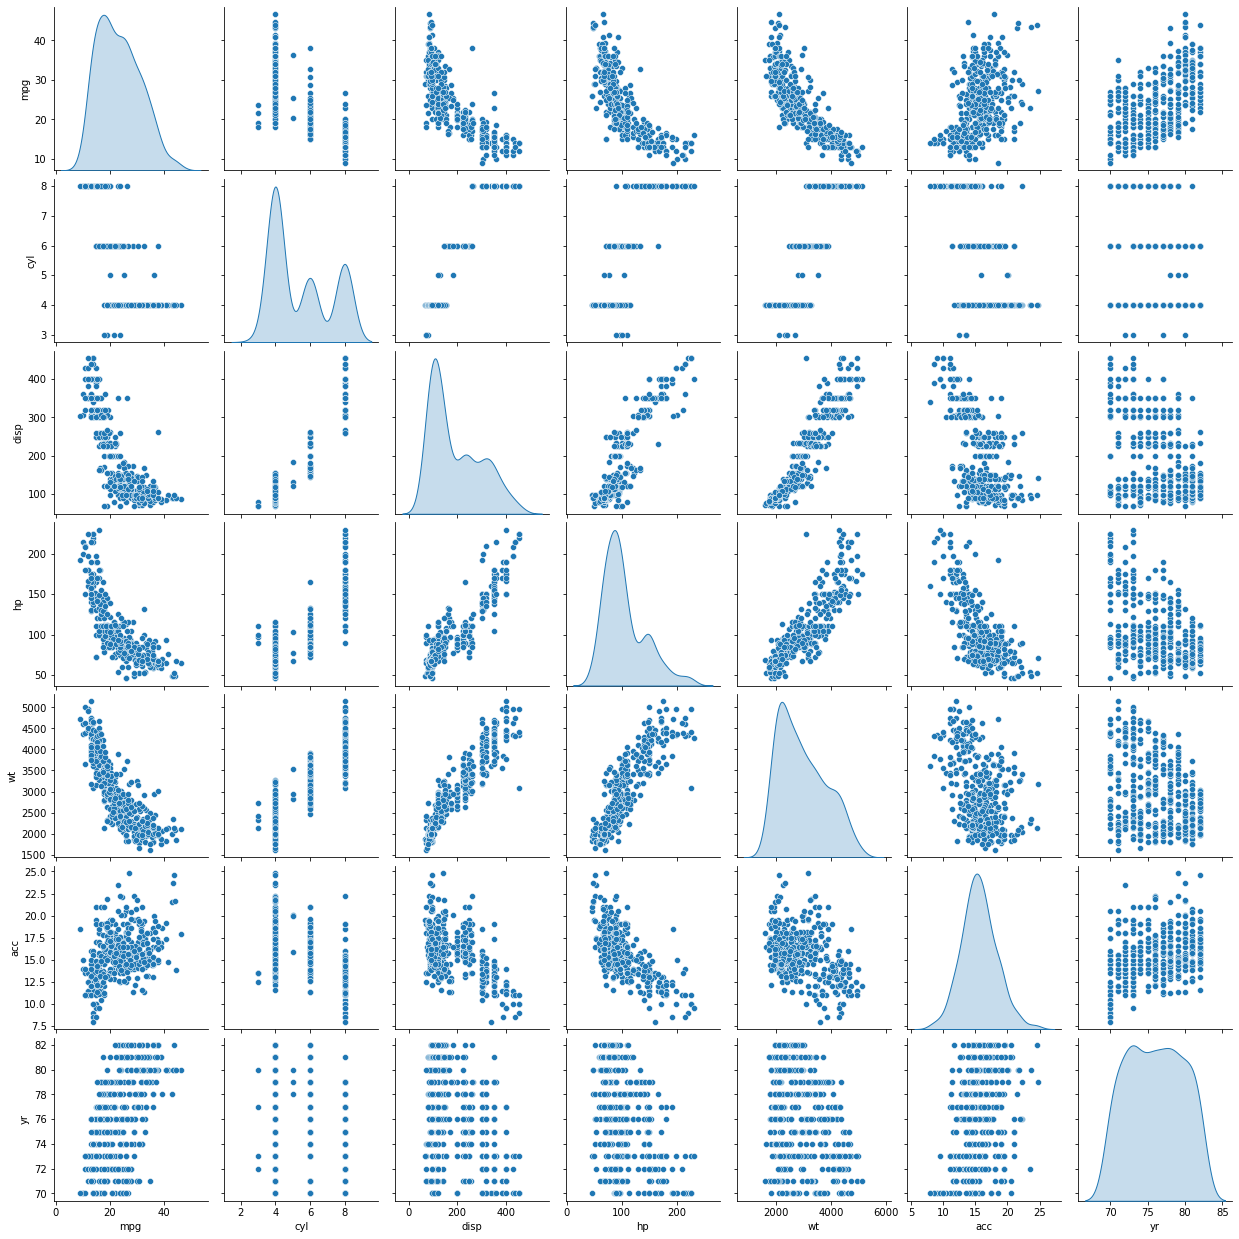

In [142]:
car_df_attr=car_df.iloc[:,:7]
sns.pairplot(car_df_attr, diag_kind='kde')

###  Plots describing the correlation with mpg

#### Acceleration to mpg with cylinder as category

<AxesSubplot:xlabel='mpg', ylabel='acc'>

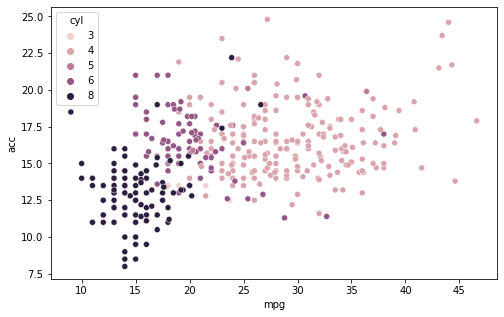

In [143]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mpg',y='acc',hue='cyl',data=car_df)

* Cylinders have a direct relation with mpg, higher the cylinder gives lower mpg.<br>
* Cylinder to mpg moderately related and directly proportional

#### Weight to mpg with cylinder as category

<AxesSubplot:xlabel='mpg', ylabel='wt'>

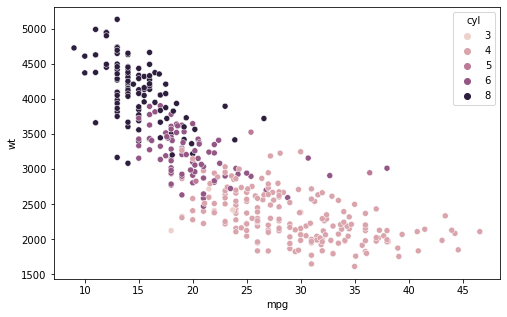

In [144]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mpg',y='wt',hue='cyl',data=car_df)

* Heavier cars requires more cylinders and hence resulting in lower mpg.<Br>
* Weight to mpg highly related and inversely proportional

#### Displacement to mpg with cylinder as category

<AxesSubplot:xlabel='mpg', ylabel='yr'>

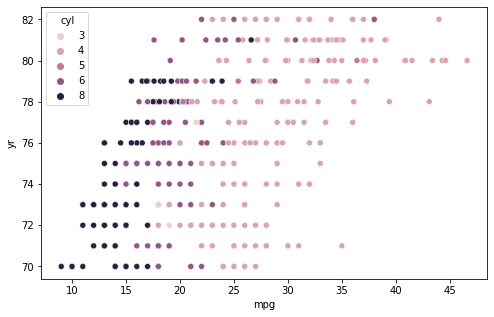

In [145]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='mpg',y='yr',hue='cyl',data=car_df)

* mpg has improved over the years <br>
*Moderate relation between year and mpg though

#### Cylinder to mpg to see relationship and distributio

<AxesSubplot:xlabel='cyl', ylabel='mpg'>

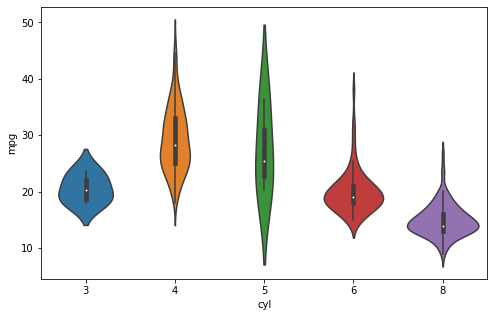

In [146]:
plt.figure(figsize=(8,5))
sns.violinplot(x='cyl',y='mpg',data=car_df)

* Higher cylinders give lower mpg <br>
* 5 cylinder cars give most variance in mpg

### Confirming insights using correlation matrix

In [147]:
corr = car_df.corr()
corr

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.442174,0.259022
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.396479,-0.352861
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.433505,-0.373886
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.318972,-0.282877
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.440817,-0.298843
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.109144,0.204473
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,0.193101,-0.024489
origin_america,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,-0.229895,1.000000


<AxesSubplot:>

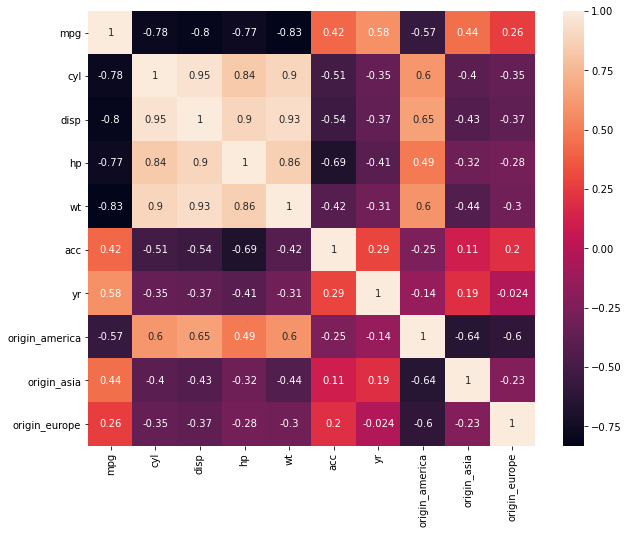

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

Insights supported by correlation matrix:<bR>

* Cylinders, Displacement and weight showing high correlation to mpg.<br>
* Acceleration and Model year are moderately correlate

## Fitting Linear Model

X=car_df.drop(['mpg'],axis=1)
Y=car_df[['mpg']]

In [149]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [150]:
reg_model=LinearRegression()
reg_model.fit(X_train, Y_train)

LinearRegression()

In [151]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cyl is -0.39480796616483216
The coefficient for disp is 0.028945510765487556
The coefficient for hp is -0.021752207723547322
The coefficient for wt is -0.007352032065147358
The coefficient for acc is 0.061919366007618305
The coefficient for yr is 0.8369338917645004
The coefficient for origin_america is -1.7988493458374286
The coefficient for origin_asia is 0.5964156907563435
The coefficient for origin_europe is 1.202433655081085


In [152]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -19.485884771453183


In [153]:
reg_model.score(X_train, Y_train)

0.8141025501610559

In [154]:
reg_model.score(X_test, Y_test)

0.8433135132808829

so, the final multi linear regression we get is-
####  y = (-19.485)+ (-.3948*x1)+ (.0289*x2)+ (-0.0217*x3)+ (-0.0073*x4)+ (0.0619*x5)+ (0.8369*x6)+ (-1.7988*x7)+ (0.5964*x8)+  (1.2024*x9)

#### R square for training dataset  = 0.81
#### R square for test dataset         = 0.84
So, Our Model is not Underfitting or Overfitting model,<br>
#### it is Generlised model.

## Fitting Polynomial(of degree 2) Regression Model

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, Y_train))

0.8995492105437926


In [158]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, Y_test))

0.861349075272287


In [159]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly